In [1]:
# importing pandas module
import pandas as pd

# importing the time series dataset
data = pd.read_csv("BTC-USD.csv")

# printing
data.head()

Date          Open          High           Low         Close  \
0  2021-09-05  49937.859375  51868.679688  49538.597656  51753.410156   
1  2021-09-06  51769.003906  52700.941406  51053.679688  52633.535156   
2  2021-09-07  52660.480469  52853.765625  43285.207031  46811.128906   
3  2021-09-08  46827.761719  47334.054688  44561.394531  46091.390625   
4  2021-09-09  45774.742188  47261.949219  45669.738281  46391.421875   

      Adj Close       Volume  
0  51753.410156  30322676319  
1  52633.535156  38884105426  
2  46811.128906  65210059683  
3  46091.390625  49007762488  
4  46391.421875  38672657013

In [2]:
# dropping columns
data.drop('Open', inplace=True, axis=1)
data.drop('High', inplace=True, axis=1)
data.drop('Low', inplace=True, axis=1)
data.drop('Adj Close', inplace=True, axis=1)
data.drop('Volume', inplace=True, axis=1)

# printing few rows
data.head()




Date         Close
0  2021-09-05  51753.410156
1  2021-09-06  52633.535156
2  2021-09-07  46811.128906
3  2021-09-08  46091.390625
4  2021-09-09  46391.421875

In [4]:
# importing the required modules
from statsmodels.tsa.stattools import adfuller
from numpy import log

# dropping the null values
result = adfuller(data.Close.dropna())

# finding the p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.701959
p-value: 0.846242


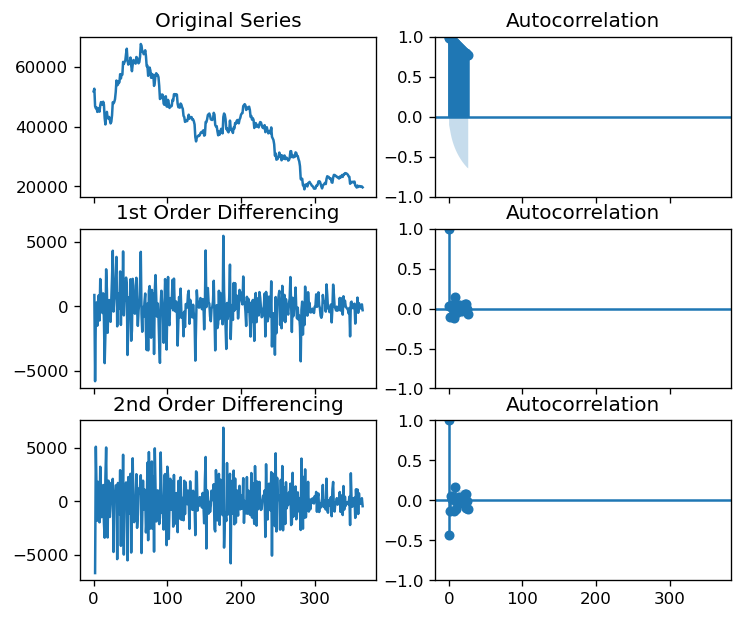

In [11]:
# Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Size of the time series plots
plt.rcParams.update({'figure.figsize':(7,6), 'figure.dpi':120})


# plotting original time series data
fig, axes = plt.subplots(3, 2, sharex=True)

# labeling the original data
axes[0, 0].plot(data.Close); axes[0, 0].set_title('Original Series')
plot_acf(data.Close, ax=axes[0, 1])

# first differenciating to make the data stationary
axes[1, 0].plot(data.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Close.diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(data.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Close.diff().diff().dropna(), ax=axes[2, 1])
plt.show()
plt.show()

/home/uca/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


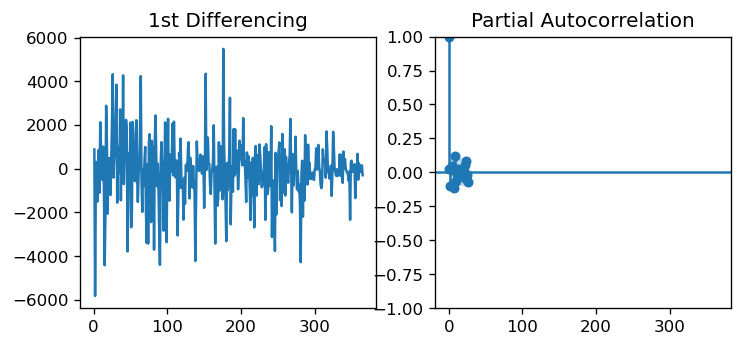

In [12]:
#importing the module
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# partial correlation of first term
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

# plotting on differen axis
axes[0].plot(data.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

# plotting partial autocorrelation function
plot_pacf(data.Close.diff().dropna(), ax=axes[1])
plt.show()

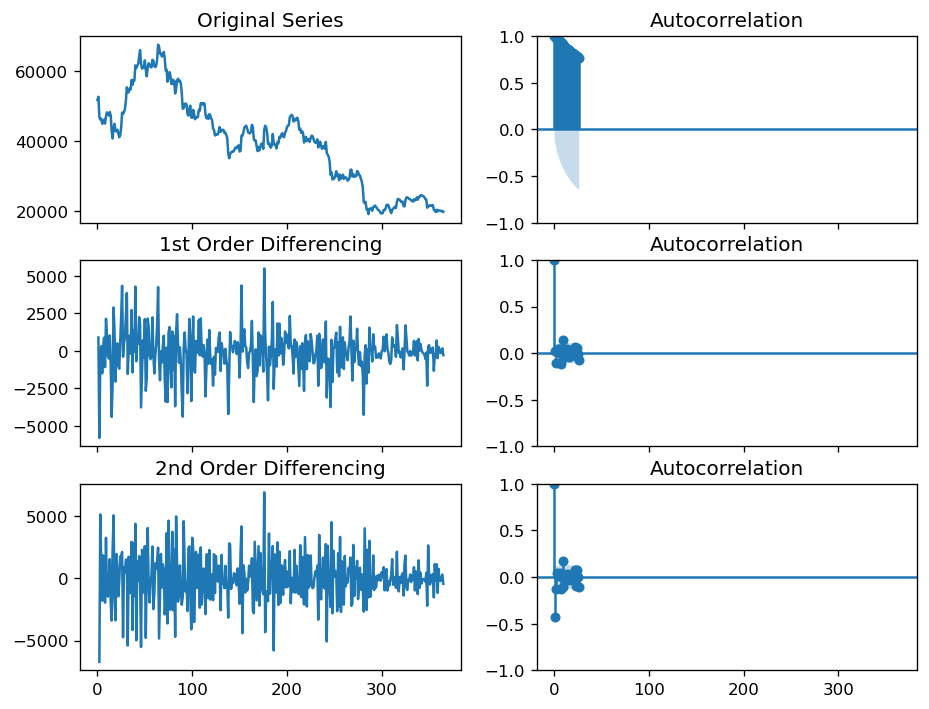

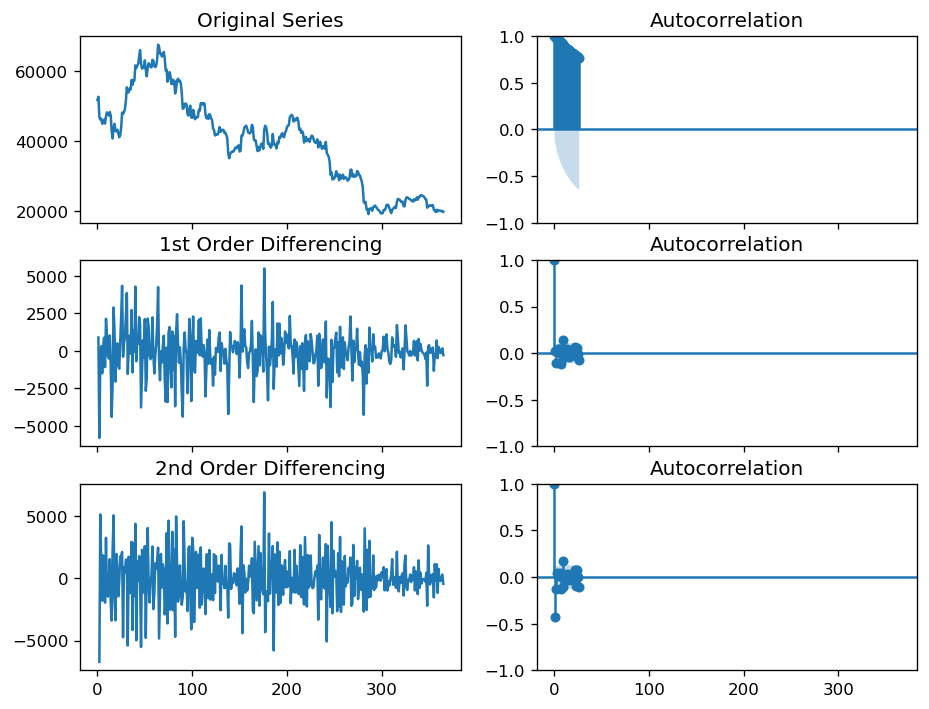

In [14]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.Close); axes[0, 0].set_title('Original Series')
plot_acf(data.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Close.diff().diff().dropna(), ax=axes[2, 1])

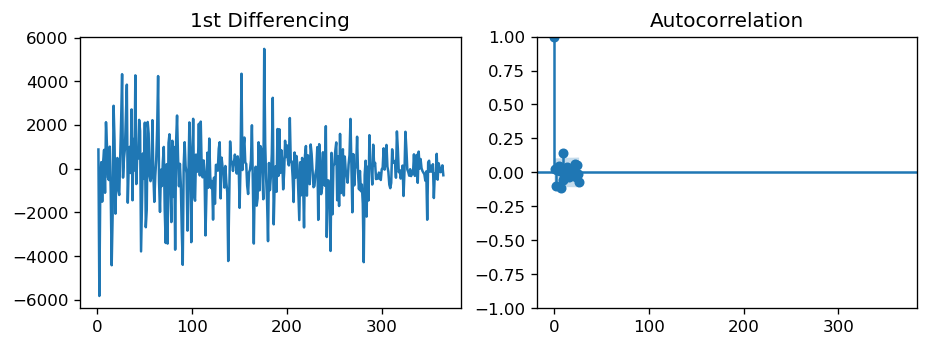

In [15]:
# setting the size
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#  fixing the subplots
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))

# plotting the autocorrelation function
plot_acf(data.Close.diff().dropna(), ax=axes[1])
plt.show()

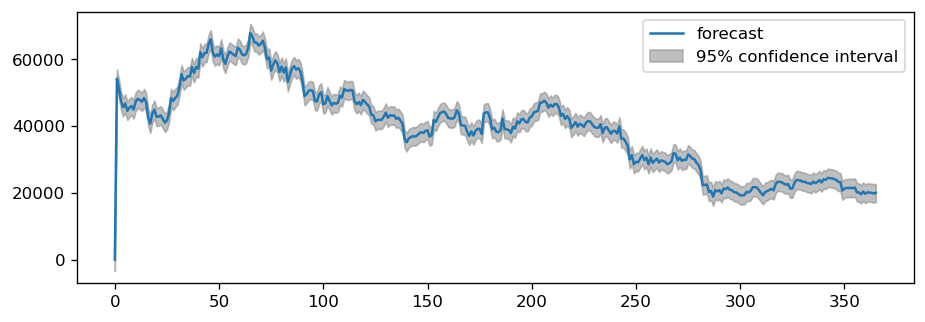

In [27]:
# importing the model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

# values of p, d, and q
ARIMA_model = sm.tsa.arima.ARIMA(data.Close, order=(1,1,1))

# Training process 
model_fit = ARIMA_model.fit()

# arima model results
plot_predict(model_fit,dynamic=False)
plt.show()

In [23]:
# %pip install statsmodels==0.6.1 

     |████████████████████████████████| 7.4 MB 1.1 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/uca/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/setup.py'"'"'; __file__='"'"'/tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ao8o4uzr
       cwd: /tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/
  Complete output (1072 lines):
  /tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/setup.py:362: SyntaxWarning: "is" with a literal. Did you mean "=="?
    if i is "tests":
  /tmp/pip

Failed to build statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
    Running setup.py install for statsmodels ... error
    ERROR: Command errored out with exit status 1:
     command: /home/uca/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/setup.py'"'"'; __file__='"'"'/tmp/pip-install-h84qkon_/statsmodels_c358c77a2d8c424ab79e69ebe1646950/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-whhtfv7t/install-record.txt --single-version-externally-managed --compile --install-headers /home/uca

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Create Training and Test
train = data.Close[:130]
test = data.Close[130:]

#  Build Model 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast using 95% confidence interval
fc, se, conf = fitted.forecast(39, alpha=0.05) 

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [31]:
# changing the column name
data.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [34]:
# importing the module
from prophet import Prophet

# 95% confidence interval
model = Prophet(interval_width= 0.95)

# training the model
model.fit(data)

18:29:21 - cmdstanpy - INFO - Chain [1] start processing
18:29:21 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# %pip install prophet

     |████████████████████████████████| 8.9 MB 108 kB/s eta 0:00:01
     |████████████████████████████████| 181 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 877 kB/s  eta 0:00:01
     |████████████████████████████████| 80 kB 892 kB/s eta 0:00:011
     |████████████████████████████████| 5.4 MB 20 kB/s  eta 0:00:01
     |████████████████████████████████| 1.8 MB 6.2 MB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730971 sha256=a3e5b397a9d2713be04bce332816e2361d8c9bb20e70e5525eabd63f233400c5
  Stored in directory: /home/uca/.cache/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
Note: you may need to restart the kernel to use updated packages.


In [54]:
# forecasting for future
future = model.make_future_dataframe(periods=3, freq='M')

# forecast predictions
forecast = model.predict(future)

# prediction head
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2021-09-05  43524.185839  38024.018236  49382.037492  43524.185839   
1 2021-09-06  43838.084662  38657.056035  49926.307747  43838.084662   
2 2021-09-07  44151.983485  38510.477341  49734.349966  44151.983485   
3 2021-09-08  44465.882309  38905.630648  51042.148962  44465.882309   
4 2021-09-09  44779.781132  38996.023131  50427.795807  44779.781132   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  43524.185839       76.598307             76.598307             76.598307   
1  43838.084662      115.645096            115.645096            115.645096   
2  44151.983485      109.841615            109.841615            109.841615   
3  44465.882309      239.502260            239.502260            239.502260   
4  44779.781132      -31.983299            -31.983299            -31.983299   

       weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   76.598307     76.598307     76.598307                   0.0   
1  115.645096    115.645096    115.645096                   0.0   
2  109.841615    109.841615    109.841615                   0.0   
3  239.502260    239.502260    239.502260                   0.0   
4  -31.983299    -31.983299    -31.983299                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  43600.784146  
1                         0.0                         0.0  43953.729758  
2                         0.0                         0.0  44261.825100  
3                         0.0                         0.0  44705.384568  
4                         0.0                         0.0  44747.797833

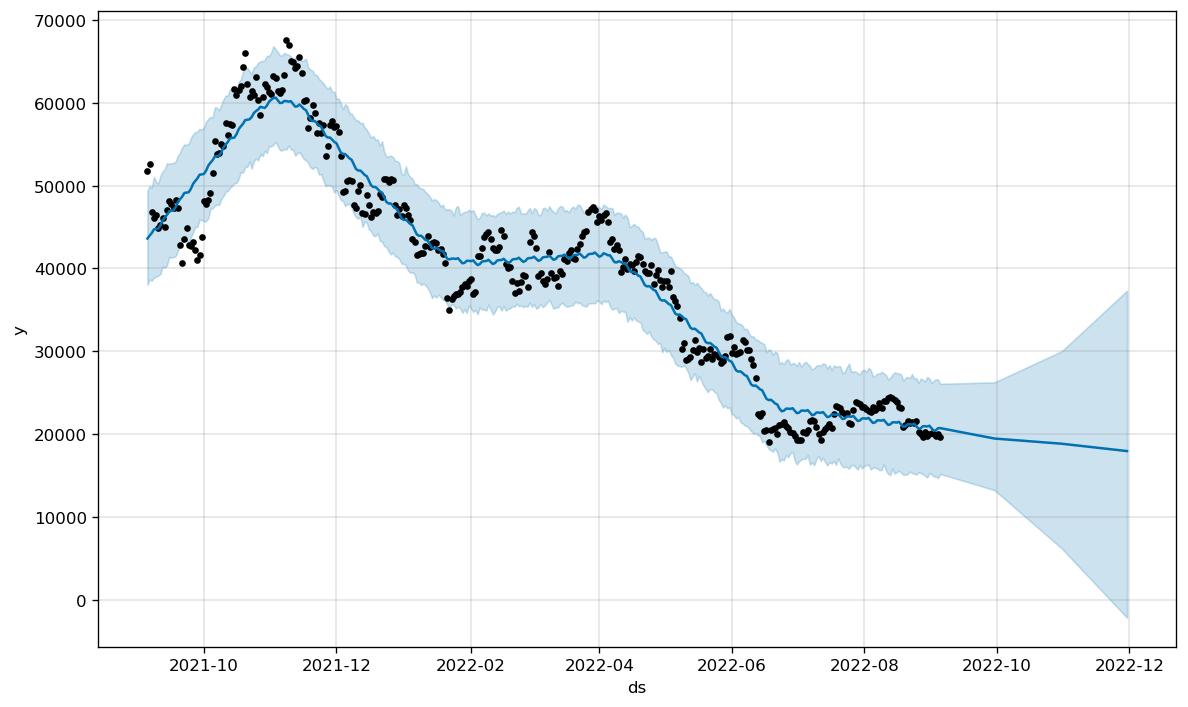

In [55]:
# visualizing the forecat predictions
forecasting = model.plot(forecast)

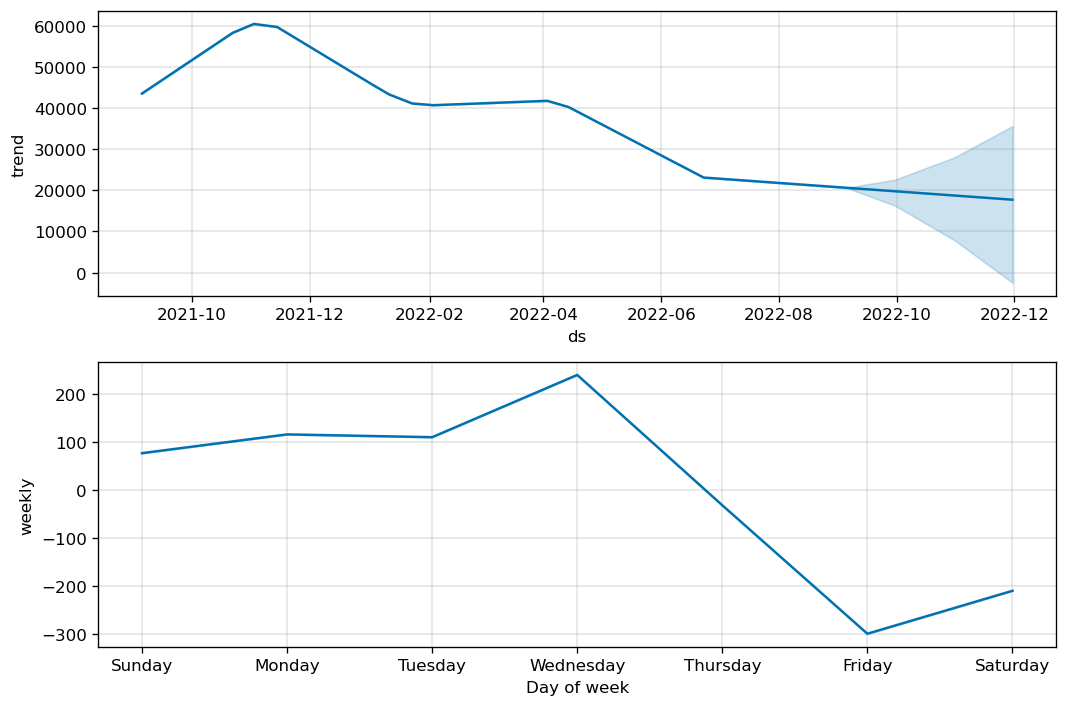

In [57]:
# yearly and weekly seasonality
components = model.plot_components(forecast)

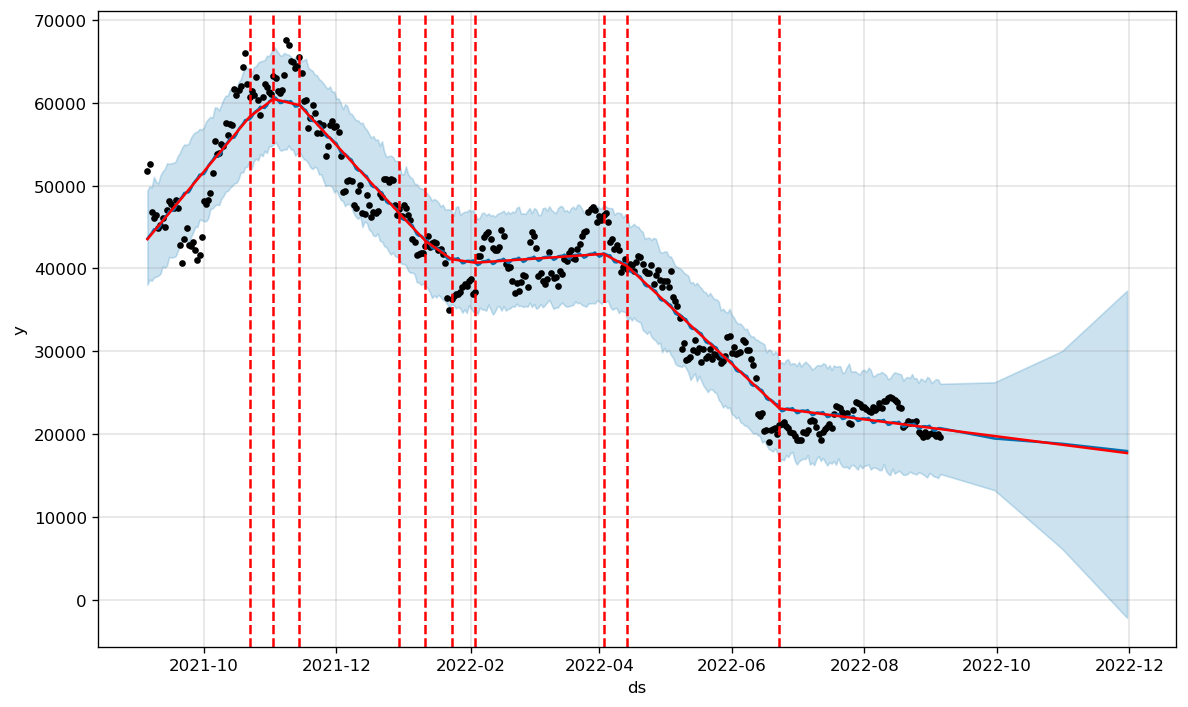